In [3]:
import pandas as pd

# # Sampling
# df = pd.read_csv("data/car_sales_data.csv")

# sampled_df = df.sample(n=1000000, random_state=42)

# sampled_df.to_csv("data/car_sales_data_sampled.csv", index=False)


In [4]:
df = pd.read_csv("car_sales_data_sampled.csv")

In [5]:
df.head()

Date      Salesperson  Customer Name   Car Make  Car Model  Car Year  \
0   6/19/2022  Rebecca Hampton  Joseph Gordon       Ford    Corolla      2013   
1  10/30/2022   Dustin Mcclure   George Young     Nissan  Silverado      2013   
2  10/21/2022       James Byrd  Jason Hampton      Honda      F-150      2014   
3   5/18/2022   Mary Hernandez    Julie Kirby  Chevrolet      Civic      2013   
4   6/23/2022     Paul Coleman   Amanda Brown      Honda    Corolla      2015   

   Sale Price  Commission Rate  Commission Earned  
0       32650         0.106302            3470.76  
1       25102         0.123075            3089.43  
2       30682         0.123758            3797.13  
3       41999         0.082959            3484.21  
4       36086         0.144156            5202.01

In [6]:
df["Year"] = pd.to_datetime(df["Date"]).dt.year

In [7]:
print("Year (from Date):", df["Year"].unique())
print("Car Make:", df["Car Make"].unique())
print("Car Model:", df["Car Model"].unique())
print("Car Year:", sorted(df["Car Year"].unique()))

Year (from Date): [2022 2023]
Car Make: ['Ford' 'Nissan' 'Honda' 'Chevrolet' 'Toyota']
Car Model: ['Corolla' 'Silverado' 'F-150' 'Civic' 'Altima']
Car Year: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


In [8]:
df = df[["Date", "Car Make", "Car Model", "Car Year", "Sale Price"]]
df.head()

Date   Car Make  Car Model  Car Year  Sale Price
0   6/19/2022       Ford    Corolla      2013       32650
1  10/30/2022     Nissan  Silverado      2013       25102
2  10/21/2022      Honda      F-150      2014       30682
3   5/18/2022  Chevrolet      Civic      2013       41999
4   6/23/2022      Honda    Corolla      2015       36086

In [9]:
# No missing values

# df.info()
# df.isnull().sum()

In [10]:
# No outliers

# df["Sale Price"].describe()
# sns.boxplot(x=df["Sale Price"])


In [11]:
# df.dtypes

In [12]:
df["Date"] = pd.to_datetime(df["Date"])

In [13]:
df["YearMonth"] = df["Date"].dt.to_period("M") # ex) 2022-06

In [14]:
df["Month"] = df["Date"].dt.month # ex) 6

In [15]:
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Fall"

df["Season"] = df["Month"].apply(get_season)

In [16]:
df["Age"] = df["Date"].dt.year - df["Car Year"]

In [17]:
df.head()

Date   Car Make  Car Model  Car Year  Sale Price YearMonth  Month  \
0 2022-06-19       Ford    Corolla      2013       32650   2022-06      6   
1 2022-10-30     Nissan  Silverado      2013       25102   2022-10     10   
2 2022-10-21      Honda      F-150      2014       30682   2022-10     10   
3 2022-05-18  Chevrolet      Civic      2013       41999   2022-05      5   
4 2022-06-23      Honda    Corolla      2015       36086   2022-06      6   

   Season  Age  
0  Summer    9  
1    Fall    9  
2    Fall    8  
3  Spring    9  
4  Summer    7

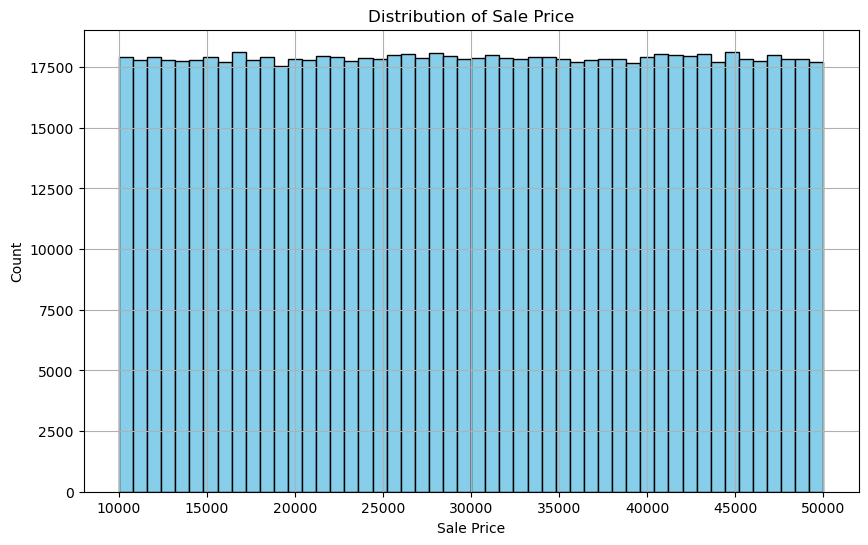

In [18]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.hist(df["Sale Price"], bins=50, color='skyblue', edgecolor='black')
# plt.title("Distribution of Sale Price")
# plt.xlabel("Sale Price")
# plt.ylabel("Count")
# plt.grid(True)
# plt.show()


In [19]:
# df["Sale Price"].describe()


count    893634.000000
mean      30006.002363
std       11541.568576
min       10000.000000
25%       20018.000000
50%       30002.000000
75%       40013.750000
max       50000.000000
Name: Sale Price, dtype: float64

In [31]:
df.to_csv("car_sales_data_final.csv", index=False)

# Monthly Price Trend

In [15]:
price_trend = (
    df.groupby(["Car Make", "Car Model", "Car Year", "YearMonth"])["Sale Price"]
      .mean()
      .reset_index(name="Average Price")
)


In [16]:
price_trend = price_trend.sort_values(by=["Car Make", "Car Model", "Car Year", "YearMonth"])


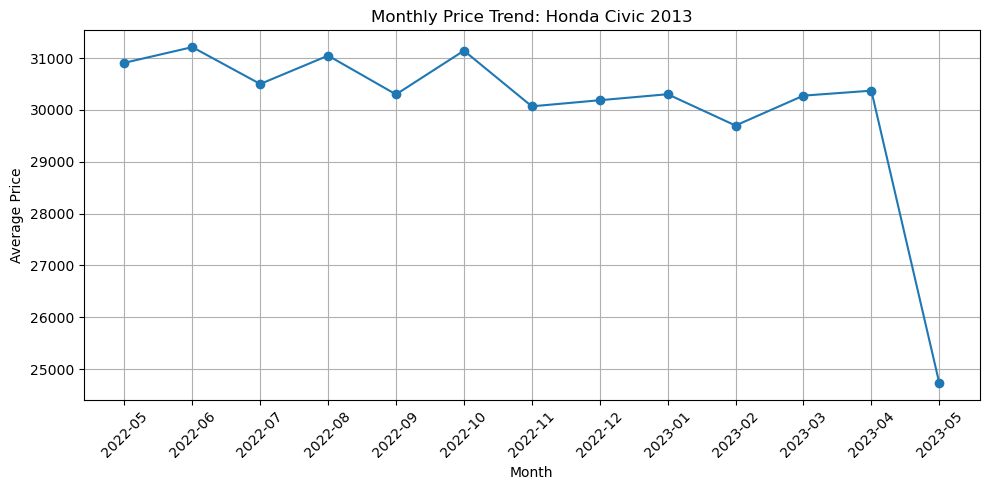

In [17]:
import matplotlib.pyplot as plt

# 예: 특정 차종만 필터링
filtered = price_trend[
    (price_trend["Car Make"] == "Honda") &
    (price_trend["Car Model"] == "Civic") &
    (price_trend["Car Year"] == 2013)
]

plt.figure(figsize=(10, 5))
plt.plot(filtered["YearMonth"].astype(str), filtered["Average Price"], marker="o")
plt.title("Monthly Price Trend: Honda Civic 2013")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# Why huge drop in 2

df[
    (df["Car Make"] == "Honda") &
    (df["Car Model"] == "Civic") &
    (df["Car Year"] == 2013)
].groupby("YearMonth").size()


YearMonth
2022-05    216
2022-06    209
2022-07    238
2022-08    254
2022-09    231
2022-10    216
2022-11    230
2022-12    258
2023-01    235
2023-02    210
2023-03    231
2023-04    205
2023-05      2
Freq: M, dtype: int64

# Seasonal Price Trend

In [25]:
# seasonal_price = (
#     df.groupby("Season")["Sale Price"]
#       .mean()
#       .reset_index(name="Average Price")
#       .sort_values(by="Average Price", ascending=False)
# )

In [26]:
# import seaborn as sns

# sns.barplot(data=seasonal_price, x="Season", y="Average Price")
# plt.title("Average Used Car Price by Season")
# plt.ylabel("Average Sale Price")
# plt.xlabel("Season")
# plt.show()
